# **Población mundial 1970–2022: tendencias y densidad**

***Autor***: Salvador Chacon

## **Definicion del problema**

El siguiente DataSet reúne series históricas de población por país/territorio (1970–2022) y añade contexto geográfico y demográfico: continente, capital, área (km²), densidad, tasa de crecimiento, ranking y % de la población mundial. Permite comparar niveles y tendencias, identificar países en expansión o descenso, analizar densidad y participación por continente

Preguntas como:

* ¿El crecimiento global se desaceleró? ¿Cuál es el CAGR por década del total mundial y como es su pendiente?
* ¿Cambia la participación por continentes?¿Cómo varió el share de África, Asia, America y Europa en la población mundial entre 1970 y 2022 y cuál es la pendiente por continente?
* ¿Qué porcentaje del total 2022 concentran los top 10 países y cuál es el índice de Gini/Herfindahl de la distribución de World Population Percentage?
* ¿Qué porcentaje del aumento absoluto global proviene de países con mas de 100M habitantes y cuánto aporta cada continente a ese aumento?

Serviran de guia para el analisis de este DataSet, con la intencion de responder a hipotesis como:

* África aumentó su participación del total mundial.
* Asia sigue liderando en nivel, pero su crecimiento se desacelera.
* Europa está estancada o en leve caída.
* La distribución del mundo por país es muy concentrada.
* Existe una desaceleración del crecimiento global
* La participación de América Latina esta estancada



## **Carga y preparacion de datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
url = "https://raw.githubusercontent.com/salvador551998/Salvador-Chacon-/refs/heads/main/world_population.csv"
df_population = pd.read_csv(url)

### **Exploracion inicial**

In [ ]:
df_population.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [ ]:
df_population.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [ ]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [ ]:
df_population.isna().sum()

,0
Rank,0
CCA3,0
Country/Territory,0
Capital,0
Continent,0
2022 Population,0
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,0


In [ ]:
df_population['Country/Territory'].value_counts()
df_population['Continent'].value_counts()

,count
Continent,
Africa,57
Asia,50
Europe,50
North America,40
Oceania,23
South America,14


## **EDA (Analisis exploratorio de datos)**

### **Tendencia de la poblacion global**

In [3]:
#Se suma todos los valores de cada columna en una sola entrada por año y se crea una serie para almacenar estos datos

years = ['1970 Population', '1980 Population','1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population','2022 Population']
total_year_population = {year: df_population[year].sum() for year in years}
print(total_year_population)

year_population_data = pd.Series(total_year_population)
year_population_data.index = year_population_data.index.str[:4]
year_population_data

{'1970 Population': np.int64(3694136661), '1980 Population': np.int64(4442400371), '1990 Population': np.int64(5314191665), '2000 Population': np.int64(6147055703), '2010 Population': np.int64(6983784998), '2015 Population': np.int64(7424809761), '2020 Population': np.int64(7839250603), '2022 Population': np.int64(7973413042)}


,0
1970,3694136661
1980,4442400371
1990,5314191665
2000,6147055703
2010,6983784998
2015,7424809761
2020,7839250603
2022,7973413042


Text(0, 0.5, 'Poblacion (Billones)')

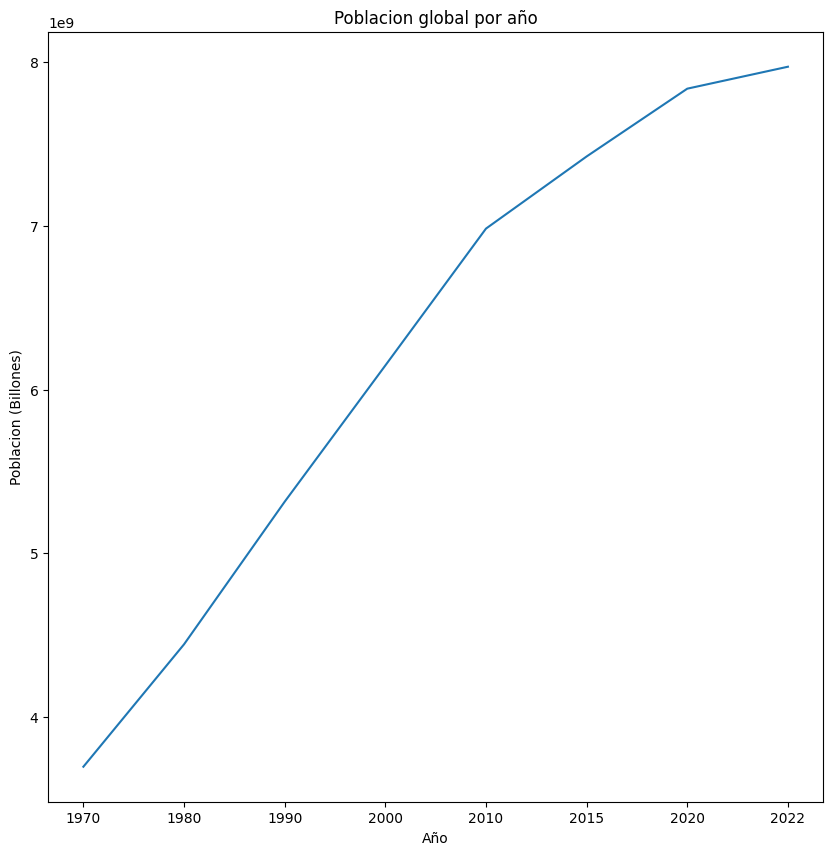

In [4]:
#Se crea un grafico de linea para analizar la tendencia de la poblacion global a lo largo del tiempo

plt.figure(figsize = (10,10))
sns.lineplot(data = year_population_data)
plt.title("Poblacion global por año")
plt.xlabel("Año")
plt.ylabel("Poblacion (Billones)")

Del grafico anterior podemos observar que:

*   La población mundial creció de ~3.700 millones en 1970 a ~8.000 millones en 2022 — un aumento de 4.300 millones en 52 años.
*   Entre 1970 y 2010, el crecimiento promedió más de 1.000 millones por década (~100 millones por año).
*   Después de 2010, el crecimiento se redujo a menos de 1.000 millones en la década.
*   Entre 2020 y 2022, solo se sumaron 100 millones, lo que sugiere que la década de 2020 podría registrar la mitad del crecimiento de décadas anteriores.

### **Poblacion por contiente**

In [5]:
continent_year_population = df_population.groupby("Continent")[years].sum().reset_index()
continent_year_population_data = pd.melt(continent_year_population,
                                         id_vars = ['Continent'],
                                         var_name = 'Years',
                                         value_name = 'Population')
continent_year_population_data["Years"] = (
    continent_year_population_data["Years"].str.replace(" Population", "")
)
continent_year_population_data.head()
continent_year_population

,Continent,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
0,Africa,365444348,481536377,638150629,818946032,1055228072,1201102442,1360671810,1426730932
1,Asia,2144906290,2635334228,3210563577,3735089604,4220041327,4458250182,4663086535,4721383274
2,Europe,655923991,692527159,720320797,726093423,735613934,741535608,745792196,743147538
3,North America,315434606,368293361,421266425,486069584,542720651,570383850,594236593,600296136
4,Oceania,19480270,22920240,26743822,31222778,37102764,40403283,43933426,45038554
5,South America,192947156,241789006,297146415,349634282,393078250,413134396,431530043,436816608


Text(0, 0.5, 'Poblacion (Billones)')

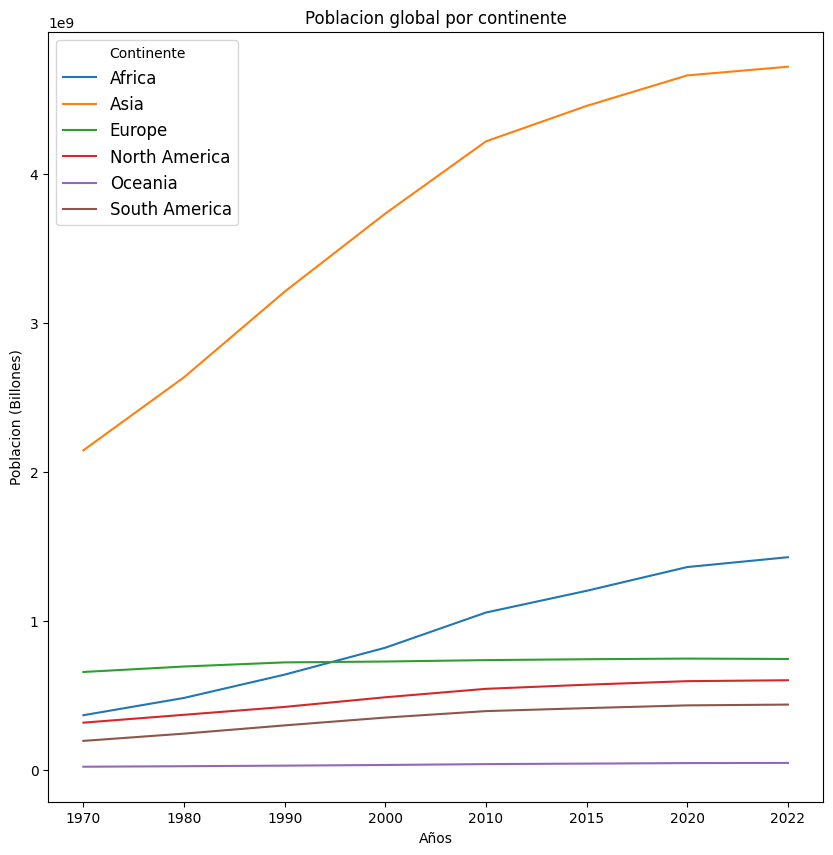

In [6]:
#Se realiza un grafico de linea para analizar la tendencia de la poblacion global por continente a lo largo del tiempo
plt.figure(figsize = (10,10))
sns.lineplot(
    data=continent_year_population_data,
    x="Years",
    y="Population",
    hue="Continent"
)
plt.legend(title="Continente", loc="upper left", fontsize='large')
plt.title("Poblacion global por continente")
plt.xlabel("Años")
plt.ylabel("Poblacion (Billones)")

Del grafico anterior podemos observar que:

*   Oceanía: La población más pequeña, con un crecimiento constante de aproximadamente 4 millones por década.
*   América: Una de las poblaciones más pequeñas con un crecimiento moderado (~50 millones por década), que se desaceleró ligeramente después de 2010.
*   Europa: Crecimiento constante hasta 1990 (~40 millones por década), luego una ligera disminución.
*   África: Experimentó grandes aumentos, pasando de ~350 millones a ~1.500 millones (entre 100 y 200 millones por década).
*   Asia: Creció drásticamente de ~ 2.000 millones a ~ 4.500 millones, con el mayor incremento entre 1970 y 2000 (~500 millones por década).
*   En general: El crecimiento poblacional fue constante en los continentes, con Asia y África como los principales contribuyentes.

### **Distribucion de poblacion entre paises**

Text(0, 0.5, 'Numero de paises')

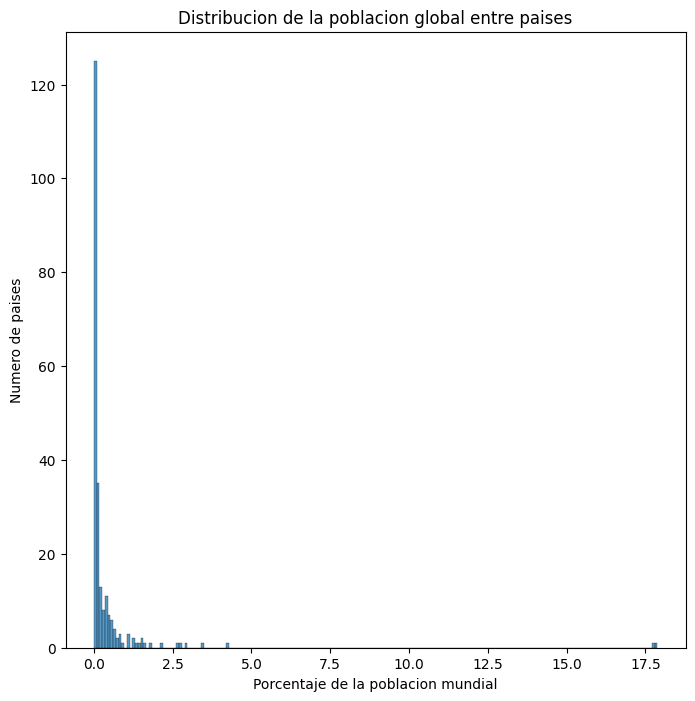

In [7]:
#Se realizaz un grafico de barras para analizar como esta distribuida la poblacion mundial a lo largo de los paises

population_distribution = df_population[['Country/Territory', 'World Population Percentage']]

plt.figure(figsize = (8, 8))
sns.histplot(population_distribution['World Population Percentage'])
plt.title("Distribucion de la poblacion global entre paises")
plt.xlabel("Porcentaje de la poblacion mundial")
plt.ylabel("Numero de paises")

(0.0, 4.5)

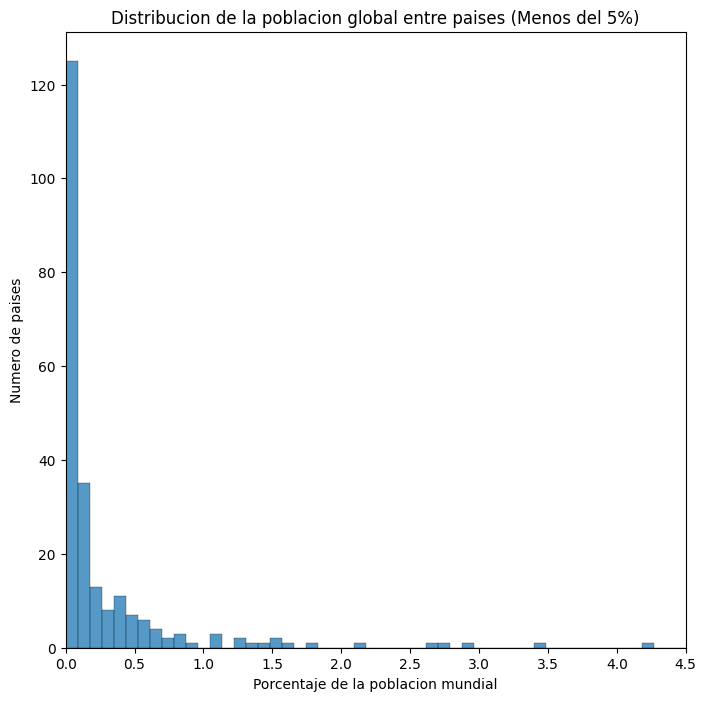

In [8]:
#Se realizaz el mismo grafico anterior pero solamente para el 5% de la poblacion mundial para entender como está esta distribuida


plt.figure(figsize = (8, 8))
sns.histplot(population_distribution['World Population Percentage'])
plt.title("Distribucion de la poblacion global entre paises (Menos del 5%)")
plt.xlabel("Porcentaje de la poblacion mundial")
plt.ylabel("Numero de paises")
plt.xlim(0, 4.5)

(17.5, 20.0)

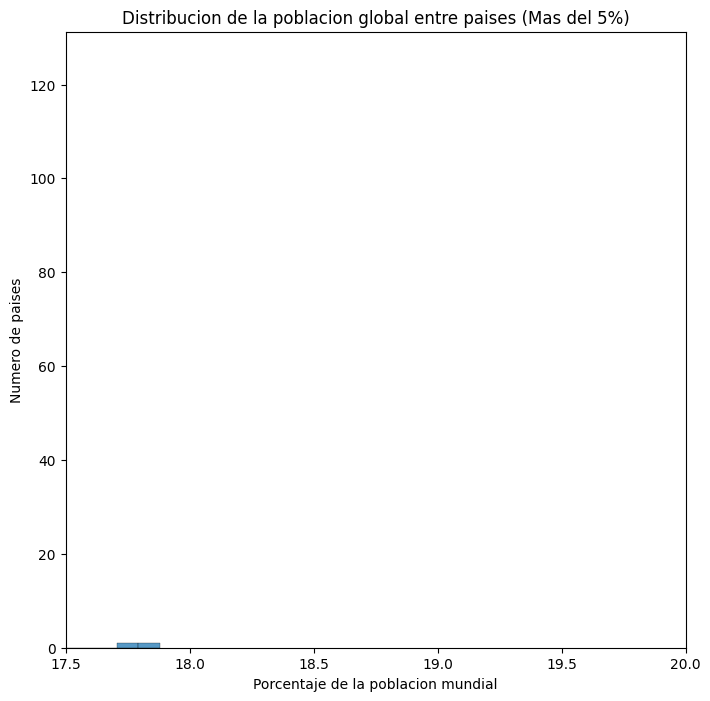

In [9]:
#Se realizaz el mismo grafico anterior pero para el% de la poblacion mundial mayor al 5% para entender como está esta distribuida el resto de la poblacion

plt.figure(figsize = (8, 8))
sns.histplot(population_distribution['World Population Percentage'])
plt.title("Distribucion de la poblacion global entre paises (Mas del 5%)")
plt.xlabel("Porcentaje de la poblacion mundial")
plt.ylabel("Numero de paises")
plt.xlim(17.5, 20)

De los graficos anteriores podemos observar que:

*   La mayoría de los países (alrededor de 160, o un 68%) tienen menos del 0,1% de la poblacion mundial.
*   Otros ~ aprox 40 países se encuentran entre 0,1% y 0,5%.
*   Aproximadamente 20 países están entre 0,5% y 1%.
*   Alrededor de 20 países se ubican en el rango medio, con entre 1% y 4,3% de la población mundial.
*   Dos países concentran casi el 18% de la población mundial cada uno.

Esto muestra que alrededor del 70% de los países contribuyen con menos del 1% a la población mundial, mientras que un número reducido de países más grandes concentra la mayor parte del resto.

### **Area vs densidad de un pais**

Text(0, 0.5, 'Densidad (por km²)')

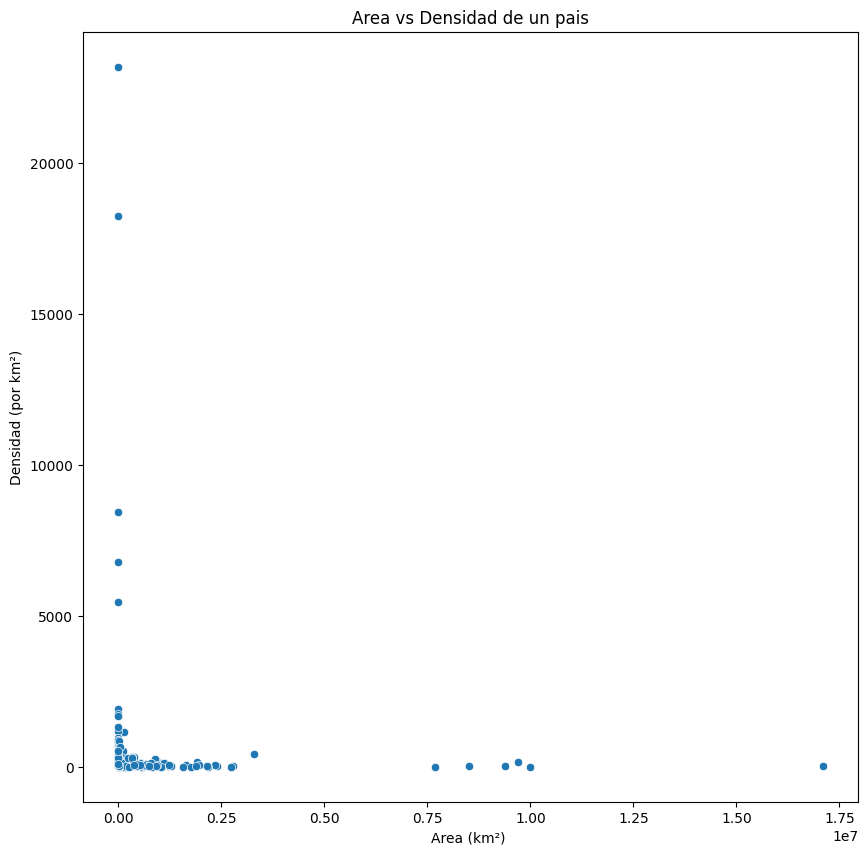

In [10]:
#Se realiza un scatter plot para ver como es la relacion a simple vista entre el area y la densidad de un pais

plt.figure(figsize = (10,10))
sns.scatterplot(x = df_population['Area (km²)'], y = df_population['Density (per km²)'])
plt.title("Area vs Densidad de un pais")
plt.xlabel("Area (km²) ")
plt.ylabel("Densidad (por km²)")

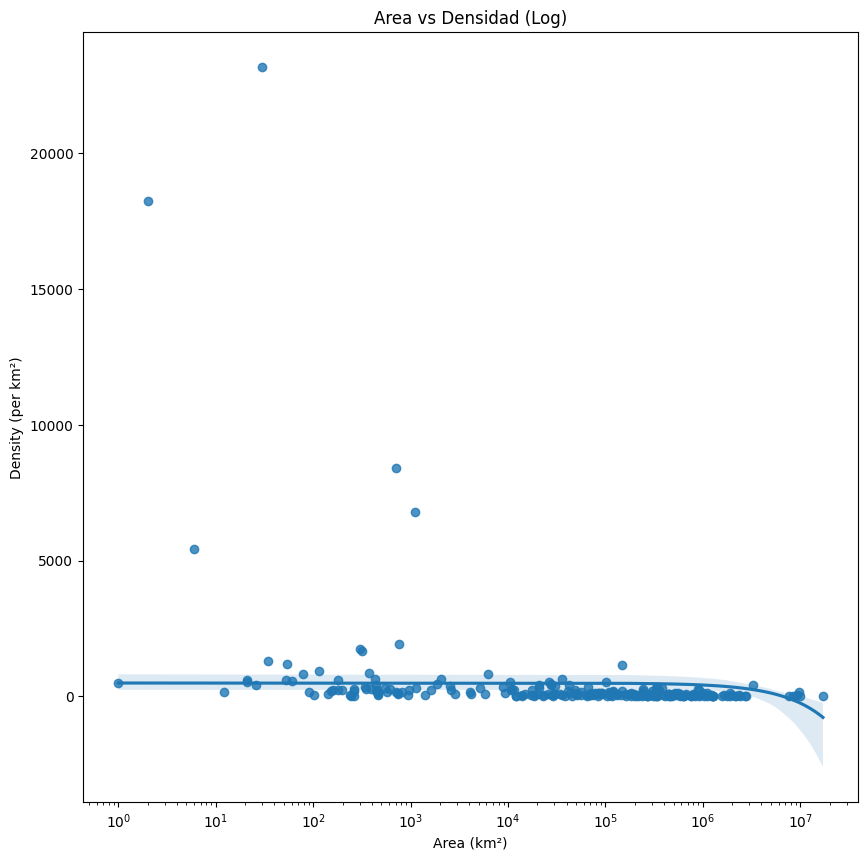

In [11]:
#Se realiza un el mismo grafico anterior pero con una linea de tendencia y un ajuste logaritmico

plt.figure(figsize = (10,10))
sns.regplot(x = df_population['Area (km²)'], y = df_population['Density (per km²)'])
plt.title("Area vs Densidad (Log)")
plt.xscale("log")

(0.0, 1000.0)

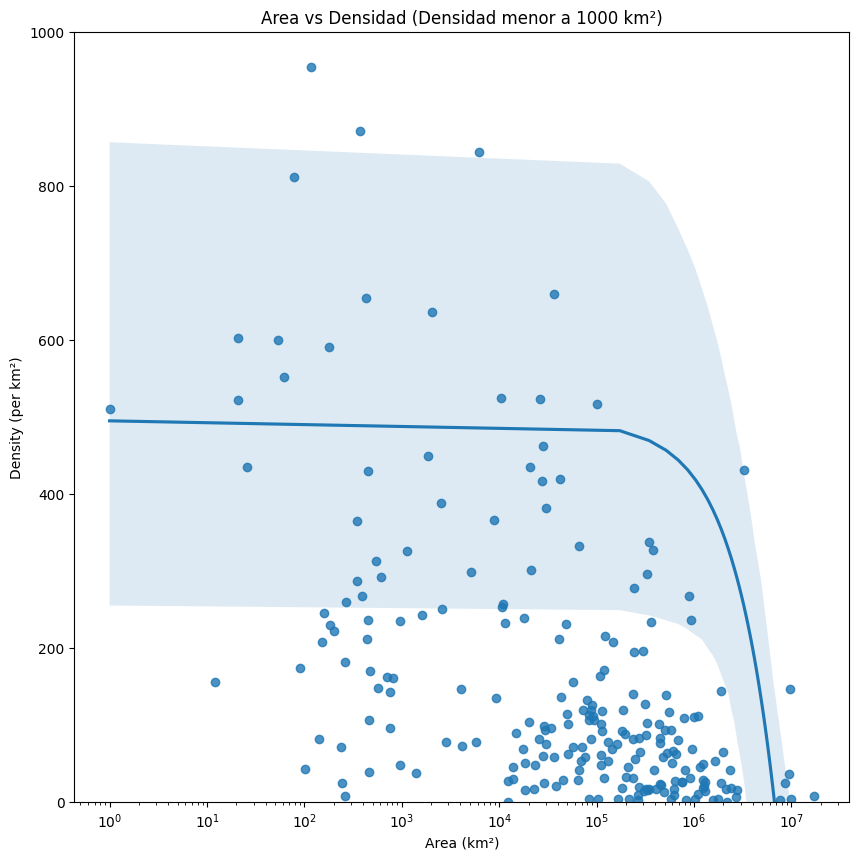

In [12]:
plt.figure(figsize = (10,10))
sns.regplot(x = df_population['Area (km²)'], y = df_population['Density (per km²)'])
plt.title("Area vs Densidad (Densidad menor a 1000 km²)")
plt.xscale("log")
plt.ylim(0, 1000)

De los graficos anteriores podemos observar que:

*   Existe una tendencia general en la que los países/territorios más grandes tienden a tener densidades de población más bajas.
*   La mayoría de los países/territorios medianos a grandes tienen una densidad de población de alrededor de 100 personas por km².
*   Los países/territorios más pequeños muestran un rango más amplio de densidades, típicamente entre 100 y 700 personas por km².
*   Unos pocos países/territorios pequeños (5 en este conjunto de datos) tienen densidades extremadamente altas, con más de 5000 personas por km².